<a href="https://colab.research.google.com/github/guilhermecarva/guilhermecarva/blob/main/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## "JUNTANDO TUDO" <br> Vamos praticar todo o aprendizado deste módulo. Para tanto, vamos utilizar o dataset MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
amostra_treino = np.random.choice(range(len(x_train)), size=60000, replace=False)
amostra_teste = np.random.choice(range(len(x_test)), size=10000, replace=False)

In [ ]:
x_train = x_train[amostra_treino,:]
y_train = y_train[amostra_treino]

x_test = x_test[amostra_teste,:]
y_test = y_test[amostra_teste]

In [ ]:
print(amostra_treino.shape, amostra_teste.shape)

(60000,) (10000,)


In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
x_train[0]

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

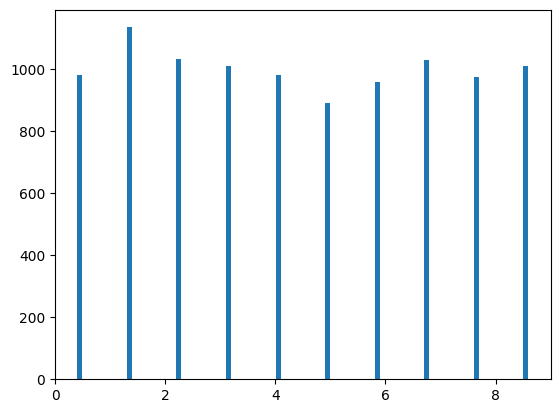

In [ ]:
plt.hist(y_test, rwidth = 0.1)

In [ ]:
# one hot encoding nos y
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


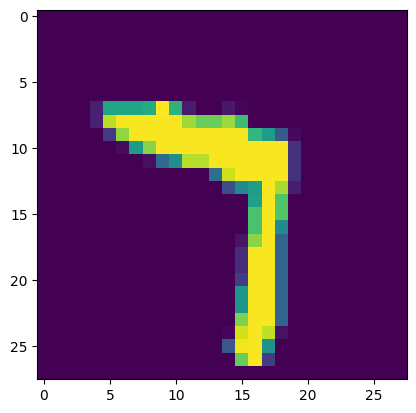

In [ ]:
i = np.random.randint(low=0, high=10000)
y_test[i]
plt.imshow(x_test[i])
print(y_test[i])

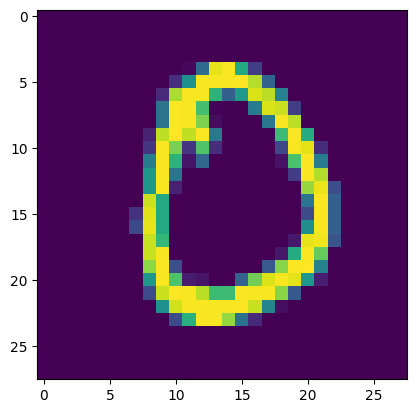

In [ ]:
plt.imshow(x_train[561])

## Vamos transferir o aprendizado do modelo VG16

### Tornar todos seus parâmetros traináveis em não treináveis e adicionar nossas camadas ao final. Para treinar somente nossa parte do modelo. <br> O tamanho das imagens do VGG16 é 224x224, e do nosso dataset 28x28. Na documentação do modelo vemos que o menor tamanho aceito é 32x32, portanto deveremos alterar o shape de entrada para o mínimo aceito.

In [ ]:
imgt = x_train.transpose(1,2,0)  #inverter a ordem do batch levando o canal para posição final (28,28,60000)
imgs_resize = tf.image.resize(imgt, (32,32)).numpy() #aplicar o resize (32,32,60000)
x_train = imgs_resize.transpose(2,0,1) #voltar a ordem original (60000,32,32)
print(x_train.shape)

(60000, 32, 32)


In [ ]:
x_train = np.expand_dims(x_train, axis=-1) #vamos adicionar uma dimensão na última posição
print(x_train.shape)

(60000, 32, 32, 1)


In [ ]:
x_train = np.repeat(x_train, 3, axis=-1) #vamos repetir cada elemento do array 3 vezes para obter a dimensão 32,32,3
print(x_train.shape)

(60000, 32, 32, 3)


In [ ]:
# aplicando o mesmo shape para o x_test
imgt = x_test.transpose(1,2,0)
imgs_resize = tf.image.resize(imgt, (32,32)).numpy()
x_test = imgs_resize.transpose(2,0,1)
x_test = np.expand_dims(x_test, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
print(x_test.shape)

(10000, 32, 32, 3)


In [ ]:
#importando a aplicação vgg16 do imagenet. Como o include_top será False, devemos especificar o input_shape
from keras.applications.vgg16 import VGG16

eff_model = VGG16(weights='imagenet', include_top = False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
#vamos instanciar o modelo apenas para poder alterar os parâmetros treináveis
model2 = keras.Sequential()
for layer in eff_model.layers:
    model2.add(layer)

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [ ]:
for layer in model2.layers:
    layer.trainable = False

In [ ]:
#tf.keras.backend.clear_session()

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [ ]:
# Adicionando layers no final. Nosso dataset MNIST possui 10 classes portanto nossa saída tem que ser com 10 classes
model2.add(layers.Flatten())
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [ ]:
model2.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>

In [ ]:
# callbacks: early stopping
stopper = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, verbose=2
)

In [ ]:
# compilando o modelo com otimizador SGD e acurácia como métrica.
opt = keras.optimizers.SGD()
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Conforme nota da documentação, a aplicação requer um pré processamento antes de passar para o modelo
Note: each Keras Application expects a specific kind of input preprocessing. For VGG16, call tf.keras.applications.vgg16.preprocess_input on your inputs before passing them to the model. vgg16.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

In [ ]:
input_test = tf.keras.applications.vgg16.preprocess_input(x_test)
input_train = tf.keras.applications.vgg16.preprocess_input(x_train)

In [ ]:
print(input_train.shape)

(60000, 32, 32, 3)


In [ ]:
print(input_test.shape)

(10000, 32, 32, 3)


In [ ]:
model2.fit(input_train,
           y_train,
           epochs=500,
           batch_size=32,
           validation_data=(input_test, y_test),
           callbacks=[stopper])

Epoch 1/500
1875/1875 [==============================] - 27s 10ms/step - loss: 0.9956 - accuracy: 0.7093 - val_loss: 0.3813 - val_accuracy: 0.8786
Epoch 2/500
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4145 - accuracy: 0.8653 - val_loss: 0.3598 - val_accuracy: 0.8766
Epoch 3/500
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3384 - accuracy: 0.8901 - val_loss: 0.2642 - val_accuracy: 0.9147
Epoch 4/500
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3037 - accuracy: 0.9013 - val_loss: 0.2369 - val_accuracy: 0.9221
Epoch 5/500
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2842 - accuracy: 0.9089 - val_loss: 0.2261 - val_accuracy: 0.9262
Epoch 6/500
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2694 - accuracy: 0.9133 - val_loss: 0.2403 - val_accuracy: 0.9228
Epoch 7/500
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2623 - accuracy: 0.9155 - val_loss: 0.2457

 Como utilizamos o EarlyStopping em nosso callback, mesmo tento fitado o modelo com 500 epochs, só precisamos de 44 para atingir um resultado satisfatório. Onde a curva do erro se estabiliza

Vamos salvar o modelo

In [ ]:
model2.save('vgg16_modificada.keras') #.h5 está obsoleto

1/1 [==============================] - 0s 33ms/step


5974 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


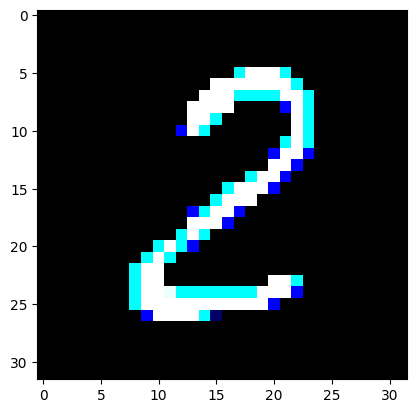

In [ ]:
i = np.random.randint(0, len(x_test))
pred = model2.predict(
    tf.expand_dims(
        tf.keras.applications.vgg16.preprocess_input(x_test[i]), 0
        )
    )

plt.imshow(x_test[i])
print(i, y_test[i])

Como podemos observar, a predição está correta.